In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [2]:
db = q.read_db(base='prices_global.pkl', add='prices_kr.pkl')

In [3]:
base_params = {
    'start': '2002-12-31', 
    'end': '2018-03-31', 
    'db': db, 
    'assets': setting.assets_global_eq, 
    'price': {'price_src':'reprice', 'trade_tol':'at_close'}, 
    'trade': {
        'trade_assets': [
            #('BND_US_Long', {'BND_US_Interm':0.3, 'BND_US_Short':0.2}), 
            #('BND_US_Long', {'BND_US_Long':1.0}), 
        ], 
        'trade_prev_nav_based': True, 
        'trade_delay': 1, 
        'cash': 100000000, 
        'expense': 0.001, 
        'gr_exposure': 0.99, }, 
    'selecting': {
        'mode': 'DualMomentum', #'DualMomentum', 'AbsoluteMomentum', 'RelativeMomentum'
        'sig_mixer': {
            'sig_w_base': [1,0,0,0,0,0,1,0,0,0,0,0], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12]
            'sig_w_dynamic': True, 
            'sig_dyn_fwd': [20,40,60], 
            'sig_dyn_m_backs': 24, 
            'sig_dyn_n_sample': 60, 
            'sig_dyn_thres': 0.1, }, 
        'market': 'ACWI', # None도 가능
        'supporter': 'BND_US_Long', 
        'cash_equiv': 'BND_US_AGG', 
        'overwrite_to_bet': [], # base_params flattening 하므로, 반드시 list of tuple로 입력
        'follow_trend': (20,60), 
        'follow_trend_market': (20, 60), 
        'n_picks': 10, }, 
    'weighting': {
        'w_type': 'ranky2', 
        'eaa_wr': 1.0, 
        'eaa_wc': 1.0, 
        'eaa_wr_bnd': 0.5, 
        'eaa_short_period': 20, 
        'iv_period': 60, 
        'w_max': 1.0, }, 
    'stats_opts': {
        'beta_to': 'ACWI', 
        'stats_n_roll': 250, }, 
    'reinforce': {
        'follow_trend_supporter': (20, 60), 
        'support_cash': True, }, 
    'te_control': {
        'bm': None, #'ACWI', 
        'te_target': None, 
        'te_k': 0.3, 
        'te_short_period': 20, 
        'te_short_up_down_ratio_cap': True, 
        'te_short_target_cap': True, 
        'te_smoother': False, 
        'safety_buffer': 0.8, }, 
    'cash_manager': {
        'cm_method': None, #'cp', 
        'up_down_ratio_period': 20, 
        'kelly_type': 'semivariance', 
        'kelly_vol_period': 250, 
        'kelly_self_eval': True, }
}

In [5]:
geam = q.Backtester(base_params, w_type='inv_ranky2')

2.105999708175659


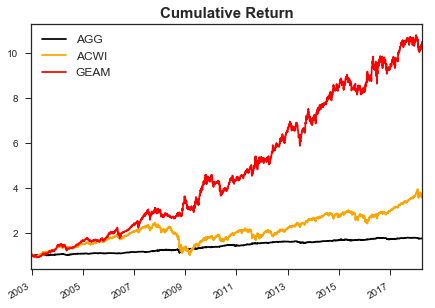

In [7]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [6]:
geam.stats.tail()

,beta,cagr,cagr_roll_med,consistency,cum_last,hit,loss_proba,mdd,n_samples,profit_to_loss,sharpe,sharpe_roll_med,std,std_roll_med
Indonesia,0.67,16.15,18.50,41.33,9.95,62.09,26.30,-72.14,3839,1.05,0.54,0.72,30.13,28.55
Peru,0.81,8.74,5.98,-141.96,2.10,54.81,41.51,-60.62,2210,1.18,0.40,0.31,21.91,19.76
UK,1.10,6.01,11.88,9.05,2.45,58.79,32.09,-63.99,3839,0.99,0.26,0.69,23.08,17.92
Sweden,1.37,11.90,17.81,22.90,5.62,56.59,32.40,-68.07,3839,1.27,0.40,0.79,30.09,22.93
DualMomentum,0.20,16.55,16.65,96.33,10.49,63.19,7.41,-21.29,3839,1.42,1.08,1.16,15.33,14.74
